<a href="https://colab.research.google.com/github/amandeep0/gec/blob/master/text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import gensim
from gensim.models import LdaModel
from gensim import models, corpora, similarities
import re
from nltk.stem.porter import PorterStemmer
import time
from nltk import FreqDist
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [2]:
url_1 = "http://gutenberg.ca/ebooks/hemingwaye-sunalsorises/hemingwaye-sunalsorises-00-t.txt"
file_1 = urllib.request.urlopen(url_1)

url_2 = "http://gutenberg.ca/ebooks/hemingwaye-menwithoutwomen/hemingwaye-menwithoutwomen-00-t.txt"
file_2 = urllib.request.urlopen(url_2)

url_3 = "http://gutenberg.ca/ebooks/hemingwaye-winnertakenothing/hemingwaye-winnertakenothing-00-t.txt"
file_3 = urllib.request.urlopen(url_3)

url_4 = "http://gutenberg.ca/ebooks/hemingwaye-greenhillsofafrica/hemingwaye-greenhillsofafrica-00-t.txt"
file_4 = urllib.request.urlopen(url_4)

url_5 = "http://gutenberg.ca/ebooks/hemingwaye-acrosstheriver/hemingwaye-acrosstheriver-00-t.txt"
file_5 = urllib.request.urlopen(url_5)

url_6 = "http://gutenberg.ca/ebooks/hemingwaye-oldmanandthesea/hemingwaye-oldmanandthesea-00-t.txt"
file_6 = urllib.request.urlopen(url_6)

files = [file_1, file_2, file_3, file_4, file_5, file_6]



In [3]:
ids = []
texts = []
id = 0
for file in files:
  doc_len = 0
  document_text = ""
  for line in file:
    formatted_string = str(line.strip())[1:]
    if len(formatted_string) < 20:
      continue
    document_text = document_text + formatted_string  
    doc_len = doc_len + 1
    if doc_len == 50:
      ids.append(id)
      texts.append(document_text)
      document_text = ""
      doc_len = 0

  id = id + 1

df = pd.DataFrame({'id': ids, 'text':texts})

In [4]:
df

id                                               text
0     0  '* A Project Gutenberg Canada Ebook *''This eb...
1     0  'of inferiority and shyness he had felt on bei...
2     0  'very forceful, and Cohn never had a chance of...
3     0  '"You forgot to get your paper," I said.''"Tha...
4     0  '"None of your exalted connections getting div...
..   ..                                                ...
534   5  'Now they have beaten me, he thought.  I am to...
535   5  'others too, he thought.  I live in a good tow...
536   5  'fight again, he thought.  I hope so much I do...
537   5  'sailed up onto the little patch of shingle be...
538   5  "The boy carried the hot can of coffee up to t...

[539 rows x 2 columns]

In [5]:
year_df = pd.DataFrame({'id':[0,1,2,3,4,5], 'year':[1926, 1927,1933,1935,1950,1952]})
year_df.head()

id  year
0   0  1926
1   1  1927
2   2  1933
3   3  1935
4   4  1950

In [6]:
import re
# Remove punctuation
df['book_text_processed'] = df['text'].map(lambda x: re.sub('[\',.!?*]', '', str(x)))
# Convert the titles to lowercase
df['book_text_processed'] = df['book_text_processed'].replace(r'\n',' ', regex=True) 
df['book_text_processed'] = df['book_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['book_text_processed'] = df['book_text_processed'].apply(lambda x: x.strip())
df.head()



id                                               text  \
0   0  '* A Project Gutenberg Canada Ebook *''This eb...   
1   0  'of inferiority and shyness he had felt on bei...   
2   0  'very forceful, and Cohn never had a chance of...   
3   0  '"You forgot to get your paper," I said.''"Tha...   
4   0  '"None of your exalted connections getting div...   

                                 book_text_processed  
0  a project gutenberg canada ebook this ebook is...  
1  of inferiority and shyness he had felt on bein...  
2  very forceful and cohn never had a chance of n...  
3  "you forgot to get your paper" i said"that\s s...  
4  "none of your exalted connections getting divo...

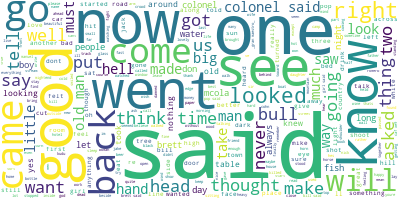

In [7]:
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['book_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


# K means



In [8]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens] #ending ended -> end
    return words

count_vectorizer = CountVectorizer(tokenizer=textblob_tokenizer)
count_data = count_vectorizer.fit_transform(df['book_text_processed'])
pd.DataFrame(count_data.toarray(), columns=count_vectorizer.get_feature_names())


1  100678  1030  1081thi  10part  11  1100  118of  12  1253thi  ...  \
0    1       0     0        0       0   0     0      0   0        0  ...   
1    0       0     0        0       0   0     0      0   0        0  ...   
2    0       0     0        0       0   0     0      0   0        0  ...   
3    0       0     0        0       0   0     0      0   0        0  ...   
4    0       0     0        0       0   0     0      0   0        0  ...   
..  ..     ...   ...      ...     ...  ..   ...    ...  ..      ...  ...   
534  0       0     0        0       0   0     0      0   0        0  ...   
535  0       0     0        0       0   0     0      0   0        0  ...   
536  0       0     0        0       0   0     0      0   0        0  ...   
537  0       0     0        0       0   0     0      0   0        0  ...   
538  0       0     0        0       0   0     0      0   0        0  ...   

     zigzag  zinc  zipper  zizi  zonda  zurito  zuritobehind  zuritomanuel  \
0         0     0       0     0      0       0             0             0   
1         0     0       0     0      0       0             0             0   
2         0     0       0     0      0       0             0             0   
3         0     0       0     0      0       0             0             0   
4         0     0       0     0      0       0             0             0   
..      ...   ...     ...   ...    ...     ...           ...           ...   
534       0     0       0     0      0       0             0             0   
535       0     0       0     0      0       0             0             0   
536       0     0       0     0      0       0             0             0   
537       0     0       0     0      0       0             0             0   
538       0     0       0     0      0       0             0             0   

     zuritopul  zuritoth  
0            0         0  
1            0         0  
2            0         0  
3            0         0  
4            0         0  
..         ...       ...  
534          0         0  
535          0         0  
536          0         0  
537          0         0  
538          0         0  

[539 rows x 18632 columns]

In [9]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
df['book_text_processed'] = df['book_text_processed'].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words ))
#df['book_text_processed'] = df['book_text_processed'].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words or not w.isalpha()))


[nltk_data] Downloading package words to
[nltk_data]     /Users/koalachelsea/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [10]:
df

id                                               text  \
0     0  '* A Project Gutenberg Canada Ebook *''This eb...   
1     0  'of inferiority and shyness he had felt on bei...   
2     0  'very forceful, and Cohn never had a chance of...   
3     0  '"You forgot to get your paper," I said.''"Tha...   
4     0  '"None of your exalted connections getting div...   
..   ..                                                ...   
534   5  'Now they have beaten me, he thought.  I am to...   
535   5  'others too, he thought.  I live in a good tow...   
536   5  'fight again, he thought.  I hope so much I do...   
537   5  'sailed up onto the little patch of shingle be...   
538   5  "The boy carried the hot can of coffee up to t...   

                                   book_text_processed  
0    a project canada this is made available at no ...  
1    of inferiority and shyness he had felt on bein...  
2    very forceful and never had a chance of not be...  
3    you forgot to get your paper i said that s so ...  
4    none of your exalted getting no listen jake if...  
..                                                 ...  
534  now they have beaten me he thought i am too ol...  
535  too he thought i live in a good could not talk...  
536  fight again he thought i hope so much i do not...  
537  sailed up onto the little patch of shingle bel...  
538  the boy carried the hot can of coffee up to th...  

[539 rows x 3 columns]

In [11]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

count_vectorizer = CountVectorizer(tokenizer=textblob_tokenizer)
count_data = count_vectorizer.fit_transform(df['book_text_processed'])
pd.DataFrame(count_data.toarray(), columns=count_vectorizer.get_feature_names())


a  aback  abandon  abdomen  abid  abil  abl  abli  abnorm  aboard  ...  \
0     4      0        0        0     0     0    0     0       0       0  ...   
1    19      0        0        0     0     0    0     0       0       0  ...   
2    15      0        0        0     0     0    0     0       0       0  ...   
3    11      0        0        0     0     0    0     0       0       0  ...   
4    12      0        0        0     0     0    0     0       1       0  ...   
..   ..    ...      ...      ...   ...   ...  ...   ...     ...     ...  ...   
534   5      0        0        0     0     0    0     0       0       0  ...   
535   8      0        0        0     0     0    0     0       0       0  ...   
536   5      0        0        0     0     0    0     0       0       0  ...   
537   9      0        0        0     0     0    0     0       0       0  ...   
538   5      0        0        0     0     0    0     0       0       0  ...   

     young  younger  your  yourself  youth  youv  yuletid  zebra  zigzag  zinc  
0        0        0     2         0      0     0        0      0       0     0  
1        1        0     0         0      0     0        0      0       0     0  
2        0        0     0         0      0     0        0      0       0     0  
3        0        0     1         0      0     0        0      0       0     0  
4        0        0     3         2      0     1        0      0       0     0  
..     ...      ...   ...       ...    ...   ...      ...    ...     ...   ...  
534      0        0     0         0      0     0        0      0       0     0  
535      0        0     2         0      0     0        0      0       0     0  
536      0        0     0         0      0     0        0      0       0     0  
537      0        0     0         0      0     0        0      0       0     0  
538      0        0     4         0      0     0        0      0       0     0  

[539 rows x 5851 columns]

## Term frequency is given by: 
## Term Frequency Formula 
$tf(w,d) = log(1 + f(w,d))$ 

##Here f(w,d) is the frequency of word w in document d.
## Second step is to calculate the inverse term frequency.
## Inverse Document Frequency Formula
$idf(w, D) = log(\frac{N}{f(w,D)})$

## With N documents in the dataset and f(w, D) the frequency of word w in the whole dataset, this number will be lower with more appearances of the word in the whole dataset.
## Final step is to compute the TF-IDF score by the following formula:

$TF-IDF = tf*idf$

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      norm='l2', 
                      use_idf=False)
matrix = vec.fit_transform(df['book_text_processed'])
lf = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
lf


/usr/local/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

aback  abandon  abdomen  abid  abil  abl  abli    abnorm  aboard  abomin  \
0      0.0      0.0      0.0   0.0   0.0  0.0   0.0  0.000000     0.0     0.0   
1      0.0      0.0      0.0   0.0   0.0  0.0   0.0  0.000000     0.0     0.0   
2      0.0      0.0      0.0   0.0   0.0  0.0   0.0  0.000000     0.0     0.0   
3      0.0      0.0      0.0   0.0   0.0  0.0   0.0  0.000000     0.0     0.0   
4      0.0      0.0      0.0   0.0   0.0  0.0   0.0  0.043234     0.0     0.0   
..     ...      ...      ...   ...   ...  ...   ...       ...     ...     ...   
534    0.0      0.0      0.0   0.0   0.0  0.0   0.0  0.000000     0.0     0.0   
535    0.0      0.0      0.0   0.0   0.0  0.0   0.0  0.000000     0.0     0.0   
536    0.0      0.0      0.0   0.0   0.0  0.0   0.0  0.000000     0.0     0.0   
537    0.0      0.0      0.0   0.0   0.0  0.0   0.0  0.000000     0.0     0.0   
538    0.0      0.0      0.0   0.0   0.0  0.0   0.0  0.000000     0.0     0.0   

     ...      york  youd     young  younger  youth      youv  yuletid  zebra  \
0    ...  0.072548   0.0  0.000000      0.0    0.0  0.000000      0.0    0.0   
1    ...  0.035714   0.0  0.035714      0.0    0.0  0.000000      0.0    0.0   
2    ...  0.000000   0.0  0.000000      0.0    0.0  0.000000      0.0    0.0   
3    ...  0.087204   0.0  0.000000      0.0    0.0  0.000000      0.0    0.0   
4    ...  0.000000   0.0  0.000000      0.0    0.0  0.043234      0.0    0.0   
..   ...       ...   ...       ...      ...    ...       ...      ...    ...   
534  ...  0.000000   0.0  0.000000      0.0    0.0  0.000000      0.0    0.0   
535  ...  0.000000   0.0  0.000000      0.0    0.0  0.000000      0.0    0.0   
536  ...  0.000000   0.0  0.000000      0.0    0.0  0.000000      0.0    0.0   
537  ...  0.000000   0.0  0.000000      0.0    0.0  0.000000      0.0    0.0   
538  ...  0.000000   0.0  0.000000      0.0    0.0  0.000000      0.0    0.0   

     zigzag  zinc  
0       0.0   0.0  
1       0.0   0.0  
2       0.0   0.0  
3       0.0   0.0  
4       0.0   0.0  
..      ...   ...  
534     0.0   0.0  
535     0.0   0.0  
536     0.0   0.0  
537     0.0   0.0  
538     0.0   0.0  

[539 rows x 5649 columns]

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      norm='l2', 
                      use_idf=True)
matrix = vec.fit_transform(df['book_text_processed'])
lf = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
lf

/usr/local/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

aback  abandon  abdomen  abid  abil  abl  abli    abnorm  aboard  abomin  \
0      0.0      0.0      0.0   0.0   0.0  0.0   0.0  0.000000     0.0     0.0   
1      0.0      0.0      0.0   0.0   0.0  0.0   0.0  0.000000     0.0     0.0   
2      0.0      0.0      0.0   0.0   0.0  0.0   0.0  0.000000     0.0     0.0   
3      0.0      0.0      0.0   0.0   0.0  0.0   0.0  0.000000     0.0     0.0   
4      0.0      0.0      0.0   0.0   0.0  0.0   0.0  0.099421     0.0     0.0   
..     ...      ...      ...   ...   ...  ...   ...       ...     ...     ...   
534    0.0      0.0      0.0   0.0   0.0  0.0   0.0  0.000000     0.0     0.0   
535    0.0      0.0      0.0   0.0   0.0  0.0   0.0  0.000000     0.0     0.0   
536    0.0      0.0      0.0   0.0   0.0  0.0   0.0  0.000000     0.0     0.0   
537    0.0      0.0      0.0   0.0   0.0  0.0   0.0  0.000000     0.0     0.0   
538    0.0      0.0      0.0   0.0   0.0  0.0   0.0  0.000000     0.0     0.0   

     ...      york  youd     young  younger  youth      youv  yuletid  zebra  \
0    ...  0.070728   0.0  0.000000      0.0    0.0  0.000000      0.0    0.0   
1    ...  0.054964   0.0  0.044323      0.0    0.0  0.000000      0.0    0.0   
2    ...  0.000000   0.0  0.000000      0.0    0.0  0.000000      0.0    0.0   
3    ...  0.132275   0.0  0.000000      0.0    0.0  0.000000      0.0    0.0   
4    ...  0.000000   0.0  0.000000      0.0    0.0  0.071503      0.0    0.0   
..   ...       ...   ...       ...      ...    ...       ...      ...    ...   
534  ...  0.000000   0.0  0.000000      0.0    0.0  0.000000      0.0    0.0   
535  ...  0.000000   0.0  0.000000      0.0    0.0  0.000000      0.0    0.0   
536  ...  0.000000   0.0  0.000000      0.0    0.0  0.000000      0.0    0.0   
537  ...  0.000000   0.0  0.000000      0.0    0.0  0.000000      0.0    0.0   
538  ...  0.000000   0.0  0.000000      0.0    0.0  0.000000      0.0    0.0   

     zigzag  zinc  
0       0.0   0.0  
1       0.0   0.0  
2       0.0   0.0  
3       0.0   0.0  
4       0.0   0.0  
..      ...   ...  
534     0.0   0.0  
535     0.0   0.0  
536     0.0   0.0  
537     0.0   0.0  
538     0.0   0.0  

[539 rows x 5649 columns]

In [14]:
from sklearn.cluster import KMeans
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(matrix) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      

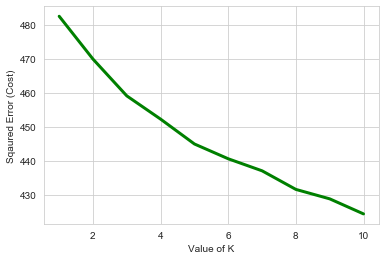

In [15]:
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

In [16]:
from sklearn.cluster import KMeans

number_of_clusters=6
km = KMeans(n_clusters=number_of_clusters)
# Normally people fit the matrix
km.fit(matrix)
# But you could fit the idf_df instead
km.fit

<bound method KMeans.fit of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>

In [17]:
df['labels'] = km.labels_

In [18]:
df.groupby(['id','labels']).size()

id  labels
0   1          10
    2          36
    3          13
    4          63
1   1           1
    2          42
    3          11
    4           4
    5          16
2   1          11
    2          56
    4           2
3   1         106
    2           3
    3           2
4   0         113
    1           6
    3           2
5   2           3
    3          39
dtype: int64

In [19]:
df.groupby(['id']).size()

id
0    122
1     74
2     69
3    111
4    121
5     42
dtype: int64

In [20]:
# number of id with labels/number of id
zf = (df.groupby(['id','labels']).size()/df.groupby(['id']).size()).reset_index(name ='accuracy')
zf.groupby('id')['accuracy'].max().reset_index(name='accuracy')

id  accuracy
0   0  0.516393
1   1  0.567568
2   2  0.811594
3   3  0.954955
4   4  0.933884
5   5  0.928571

In [21]:
from sklearn.decomposition import TruncatedSVD
sklearn_svd = TruncatedSVD(n_components = 2)
Y_sklearn = sklearn_svd.fit_transform(matrix)
df['Z_1'] = Y_sklearn[:,0]
df['Z_2'] = Y_sklearn[:,1]

In [22]:
from sklearn.cluster import KMeans

number_of_clusters=6
svd_km = KMeans(n_clusters=number_of_clusters)
svd_km.fit(Y_sklearn)
df['svd_labels'] = svd_km.labels_

In [23]:
df.groupby(['id','svd_labels']).size()

id  svd_labels
0   0             20
    1             31
    2             34
    4              1
    5             36
1   0             15
    1              3
    2             37
    4              8
    5             11
2   0             21
    1              1
    2             35
    3              1
    4              4
    5              7
3   0             16
    3             38
    4             57
4   0              5
    3             69
    4             47
5   0              1
    3             17
    4             24
dtype: int64

In [24]:
zf = (df.groupby(['id','svd_labels']).size()/df.groupby(['id']).size()).reset_index(name ='accuracy')
zf.groupby('id')['accuracy'].max().reset_index(name='accuracy')

id  accuracy
0   0  0.295082
1   1  0.500000
2   2  0.507246
3   3  0.513514
4   4  0.570248
5   5  0.571429

In [25]:
zf.sort_values('accuracy', inplace=True, ascending=False)
zf

id  svd_labels  accuracy
24   5           4  0.571429
20   4           3  0.570248
18   3           4  0.513514
12   2           2  0.507246
7    1           2  0.500000
23   5           3  0.404762
21   4           4  0.388430
17   3           3  0.342342
10   2           0  0.304348
4    0           5  0.295082
2    0           2  0.278689
1    0           1  0.254098
5    1           0  0.202703
0    0           0  0.163934
9    1           5  0.148649
16   3           0  0.144144
8    1           4  0.108108
15   2           5  0.101449
14   2           4  0.057971
19   4           0  0.041322
6    1           1  0.040541
22   5           0  0.023810
13   2           3  0.014493
11   2           1  0.014493
3    0           4  0.008197

In [26]:
id_map = {}
hash_done = {}
for _,row in zf.iterrows():
  if row['svd_labels'] in id_map:
    continue
  else:
    id_map[row['svd_labels']] = row['id']

In [27]:
map_df = pd.DataFrame({'id':map(int,list(id_map.keys())), 'transformed_id':map(int,list(id_map.values()))})
map_df

id  transformed_id
0   4               5
1   3               4
2   2               2
3   0               2
4   5               0
5   1               0

In [28]:
plot_df = pd.merge(df,map_df,on='id', how='inner')
plot_df

id                                               text  \
0     0  '* A Project Gutenberg Canada Ebook *''This eb...   
1     0  'of inferiority and shyness he had felt on bei...   
2     0  'very forceful, and Cohn never had a chance of...   
3     0  '"You forgot to get your paper," I said.''"Tha...   
4     0  '"None of your exalted connections getting div...   
..   ..                                                ...   
534   5  'Now they have beaten me, he thought.  I am to...   
535   5  'others too, he thought.  I live in a good tow...   
536   5  'fight again, he thought.  I hope so much I do...   
537   5  'sailed up onto the little patch of shingle be...   
538   5  "The boy carried the hot can of coffee up to t...   

                                   book_text_processed  labels       Z_1  \
0    a project canada this is made available at no ...       1  0.102498   
1    of inferiority and shyness he had felt on bein...       2  0.257423   
2    very forceful and never had a chance of not be...       2  0.414228   
3    you forgot to get your paper i said that s so ...       2  0.313512   
4    none of your exalted getting no listen jake if...       4  0.403927   
..                                                 ...     ...       ...   
534  now they have beaten me he thought i am too ol...       3  0.286165   
535  too he thought i live in a good could not talk...       3  0.316481   
536  fight again he thought i hope so much i do not...       3  0.272141   
537  sailed up onto the little patch of shingle bel...       3  0.300958   
538  the boy carried the hot can of coffee up to th...       2  0.371506   

          Z_2  svd_labels  transformed_id  
0   -0.058361           0               2  
1   -0.082468           0               2  
2    0.170203           5               2  
3   -0.028242           0               2  
4    0.230474           5               2  
..        ...         ...             ...  
534 -0.187927           4               0  
535 -0.122857           4               0  
536 -0.139976           4               0  
537 -0.129894           4               0  
538 -0.060865           3               0  

[539 rows x 8 columns]

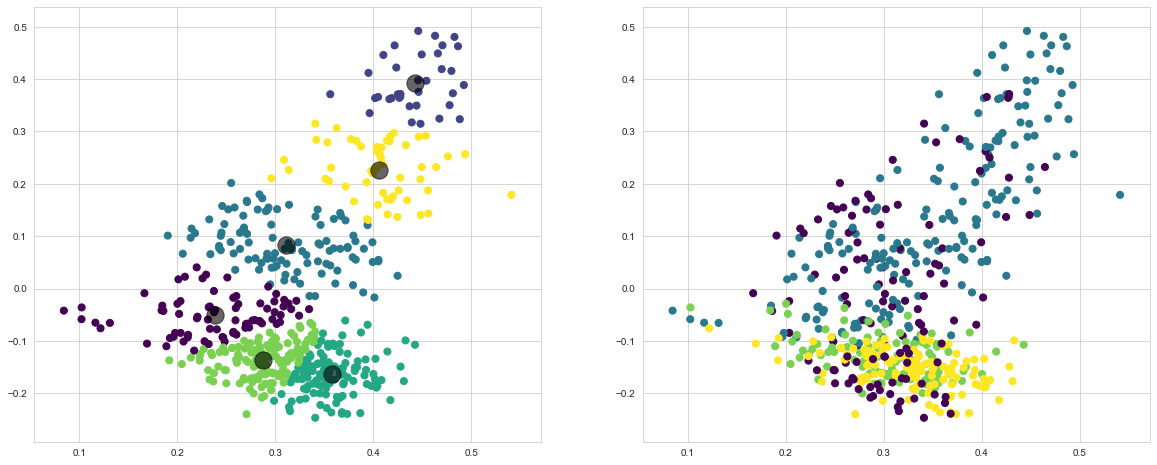

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

axes[0].scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=plot_df['svd_labels'], s=50, cmap='viridis')

centers = svd_km.cluster_centers_
axes[0].scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

axes[1].scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=plot_df['transformed_id'], s=50, cmap='viridis')

# plot 3D

In [30]:
sklearn_svd = TruncatedSVD(n_components = 3)
Y_sklearn = sklearn_svd.fit_transform(matrix)
print(matrix.shape, Y_sklearn.shape)

(539, 5649) (539, 3)


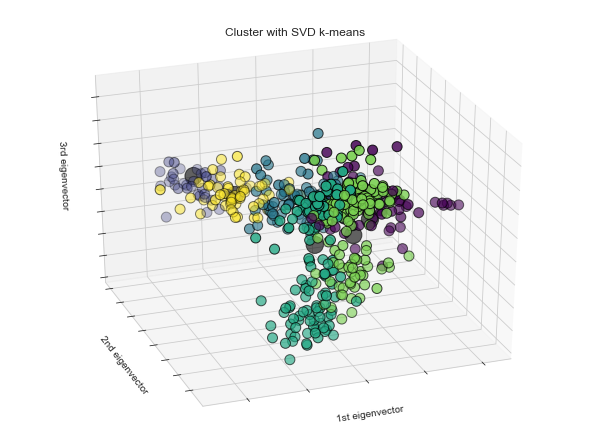

In [31]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], Y_sklearn[:, 2], c=plot_df['svd_labels'], 
              s=100, cmap='viridis', edgecolor='k')
centers = svd_km.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.6);
ax.set_title("Cluster with SVD k-means")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

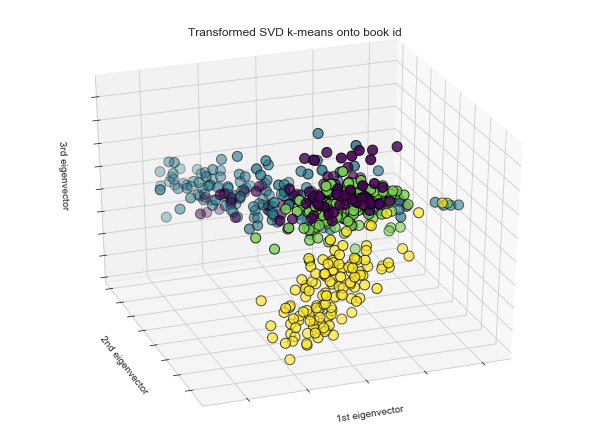

In [32]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], Y_sklearn[:, 2], c=plot_df['transformed_id'], 
              s=100, cmap='viridis', edgecolor='k')
ax.set_title("Transformed SVD k-means onto book id")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [34]:
import plotly.graph_objs as go
from plotly.offline import iplot
import numpy as np
import plotly
labels = plot_df['svd_labels']
trace = go.Scatter3d(
    x = Y_sklearn[:, 0], y = Y_sklearn[:, 1], z = Y_sklearn[:, 2], mode = 'markers', 
    marker = dict(color = labels, size = 8, 
                  line = dict(color = 'black', width = 10)))
layout = go.Layout(title = '3D Scatter plot')
fig = go.Figure(data = [trace], layout = layout)
plotly.offline.iplot(fig)

In [35]:
import plotly.graph_objs as go
from plotly.offline import iplot

import numpy as np
labels = plot_df['transformed_id']
trace = go.Scatter3d(
    x = Y_sklearn[:, 0], y = Y_sklearn[:, 1], z = Y_sklearn[:, 2], mode = 'markers', 
    marker = dict(color = labels, size = 8, 
                  line = dict(color = 'black', width = 10)))
layout = go.Layout(title = '3D Scatter plot')
fig = go.Figure(data = [trace], layout = layout)
plotly.offline.iplot(fig)

In [36]:
Scene = dict(xaxis = dict(title = 'X1 -->'), yaxis = dict(title = 'X2 -->'), zaxis = dict(title = 'X3 -->'))
trace = go.Scatter3d(x = Y_sklearn[:, 0], y = Y_sklearn[:, 1], z = Y_sklearn[:, 2], mode = 'markers', 
                     marker = dict(color = plot_df['transformed_id'], size = 10, line = dict(color = 'black', width = 10)))
layout = go.Layout(margin = dict(l=0, r=0), scene=Scene, height=800, width=800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()                       

In [37]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 2
number_words = 100
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
the and of a he to wa in i it hi on had we that with him were out up as they said there at not all but then down for one back them from man could bull you came old go into went now when over my where be see would get through come head no did veri so pop by fish thought been have saw off is look thi two good water me time like hand too us watch big long their or again road some side if onli left made what right after about sun befor got

Topic #1:
the i you and to said a it he of in that wa is t not have they we me s do with at all be what but on for him go she know colonel had no good about like as there one are my can them were hi would get her thi up don so if when out veri will from think your come just want did dont time now ani or brett then well how tell who say right never too been some got love an ye see girl could look here m hell down take bill re


In [38]:
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
#if 1 == 1:
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
#with open(LDAvis_data_filepath, 'w') as f:
#  pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
#with open(LDAvis_data_filepath) as f:
#    LDAvis_prepared = pickle.load(f)


In [39]:
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')
